In [1]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob
import datetime
# Import Mask RCNN
working_dir = os.getcwd()
print("Working directory is:",working_dir)
sys.path.append(working_dir)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

custom_WEIGHTS_PATH = "mask_rcnn_plate_0010.h5"  # TODO: update this path

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

#GPU MACHINE
ROOT_DIR= "/home/user/"
#LOCAL
ROOT_DIR= "/Users/burke.atilla"

# Root directory of the project
ROOT_DATA_DIR = os.path.join(ROOT_DIR ,'Source/data/')
# Directory to save logs and trained model
MODEL_DIR= os.path.join(ROOT_DIR , 'Source/OPY_YapayZeka/Burke/mask_rcnn_plate_detection')
print("ROOT_DATA_DIR set to:",ROOT_DATA_DIR)

config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DATA_DIR, "originals")
print("custom_DIR set to:",custom_DIR)

print("MODEL_DIR set to:",MODEL_DIR)




Working directory is: C:\Users\is95217\source\plate\turkishplate


ModuleNotFoundError: No module named 'mrcnn'

In [ ]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

In [3]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
#DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [21]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

Loading weights  mask_rcnn_plate_0010.h5
0:00:00


Loading weights  mask_rcnn_plate_0010.h5
0:00:00
image will be read: /Users/burke.atilla/Source/data/12000/1#41AR693#02042018#130027.jpg
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


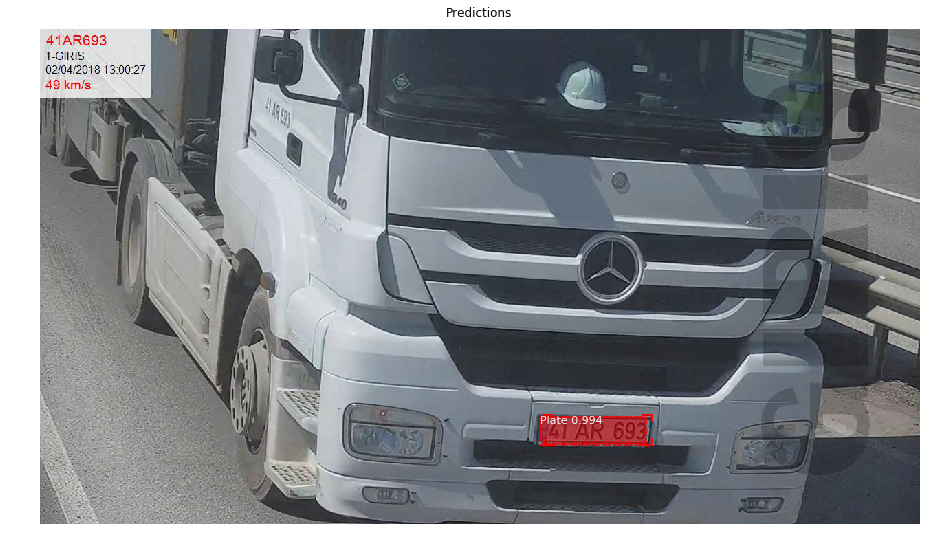

rois: [[565 728 605 882]] scores: [0.9937749]
0:00:11.185007
rois> [[565 728 605 882]]


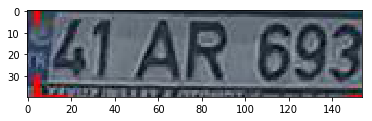

In [41]:
# Create model in inference mode
with tf.device(DEVICE):
    localize_model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,config=config)
    
# load the last model you trained
# weights_path = model.find_last()[1]
start_time = datetime.datetime.now()

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
localize_model.load_weights(custom_WEIGHTS_PATH, by_name=True)

end_time = datetime.datetime.now()
print (start_time - start_time)
    
    
start_time = datetime.datetime.now()
from scipy.ndimage import rotate


image_path = '/home/user/Source/data/6000/1#34BT1889#16042018#093210.jpg'

image_path = os.path.join(ROOT_DATA_DIR,'6000/1#34BT364#29032018#184143.jpg')

image_path = os.path.join(ROOT_DATA_DIR,'6000/1#34BT1889#16042018#093210.jpg')

image_path = os.path.join(ROOT_DATA_DIR,'12000/1#41AG237#04042018#103637.jpg') #sorun
image_path = os.path.join(ROOT_DATA_DIR,'12000/1#41AJ145#10042018#173956.jpg') #sorun

image_path = os.path.join(ROOT_DATA_DIR,'12000/1#41AL352#01072018#133612.jpg') #sorun

image_path = os.path.join(ROOT_DATA_DIR,'12000/1#41AN968#09042018#130243.jpg') #sorun

image_path = os.path.join(ROOT_DATA_DIR,'12000/1#41AR693#02042018#130027.jpg')





print("image will be read:",image_path)
#image_path = '/home/user/Source/data/custom/'+'3.jpg'
#image_path = '/home/user/Source/data/custom/'+'IMG_0667.JPG'

image = skimage.io.imread(image_path)

results = localize_model.detect([image], verbose=1)
# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            ['Background','Plate'], r['scores'], ax=ax,
                            title="Predictions")
plt.show()


print("rois:",r['rois'],"scores:",r['scores'])
end_time = datetime.datetime.now()
print (end_time - start_time)

print("rois>",r['rois'])
x1 = r['rois'][0][0]
y1 = r['rois'][0][1]
x2 = r['rois'][0][2]
y2 = r['rois'][0][3]

plt.imshow(image[x1:x2,y1:y2])
plt.show()



In [42]:
#PLATE DETECTION

In [43]:
import keras
import tensorflow as tf
import sys
import os
from keras import backend as K
import itertools

sess = tf.Session()
K.set_session(sess)

#sys.path.append(os.path.dirname(os.path.realpath('Textgen')) + "/python")
import Textgen as t

#load model
loaded_model=t.load_model()


In [44]:
letters_train = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'Y', 'Z']
letters = sorted(list(letters_train))

def decode_batch(out):
    ret = []
    for j in range(out.shape[0]):
        out_best = list(np.argmax(out[j, 2:], 1))
        out_best = [k for k, g in itertools.groupby(out_best)]
        outstr = ''
        for c in out_best:
            if c < len(letters):
                outstr += letters[c]
        ret.append(outstr)
    return ret

def predict_single_plate(sess,loaded_model,img):
    img_w,img_h = 128, 64
   
    #img = cv2.imread(img_filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (img_w, img_h))
    img = img.astype(np.float32)
    img /= 255


    net_inp = loaded_model.get_layer(name='the_input').input
    net_out = loaded_model.get_layer(name='softmax').output

    if K.image_data_format() == 'channels_first':
        X_data = np.ones([1, 1, img_w, img_h])
    else:
        X_data = np.ones([1, img_w, img_h, 1])
    
    img = img.T
    if K.image_data_format() == 'channels_first':
        img = np.expand_dims(img, 0)
    else:
        img = np.expand_dims(img, -1)
    X_data[0] = img

    net_out_value = sess.run(net_out, feed_dict={net_inp:X_data})
    pred_texts = decode_batch(net_out_value)
    print(pred_texts)


In [45]:
#predict plate
predicted_text = predict_single_plate(sess,loaded_model,image[x1:x2,y1:y2])#input directory of pic
print(predicted_text)

['41AR693']
None
